**Notes**

In this notebook, we'll be learning the basics of Numpy, Scipy, and Matplotlib. 

# 1. Warmup

## 1.1 Import Necessary Modules

You should always start you file with all of the `import` statements that you will be using for the file. This makes it easier to quickly check what modules each file depends on---all you have to do is look at the top of the file. 

For this problem, import numpy, scipy, and the pyplot submodule from matplotlib.

In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.integrate
import scipy.stats
from scipy import misc
from scipy.optimize import minimize
from matplotlib import pyplot as plt

##  1.2 Use built-in Numpy functions to do the following tasks

1. Create a vector (numpy array) of size 10 that contains all zeros and print it. (Use np.zeros.)
2. Use `arange` to create a vector of values from 5 to 24. Print it.
3. Use `arange` and Python "slicing" to create a vector of values from 24, to 5. Print it.
4. Use `arange` and Python "slicing" to create a vector consisting of all the even integers in the half-open interval $[0,30)$.
5. Use `arange` and `reshape` to create a 3x3 numpy array containing the numbers 0 to 8.

In [2]:
# Completed for you

# 1
print("1.")
Z = np.zeros(10)
print(Z)

# 2
print("2.")
print(np.arange(5,25))

# 3
print("3.")
z = np.arange(5, 25)
print(z[::-1])

# 4
print("4.")
z = np.arange(0,30)
print(z[::2])

# 5
print("5.")
print(np.arange(0,9).reshape((3,3)))

1.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2.
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
3.
[24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5]
4.
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]
5.
[[0 1 2]
 [3 4 5]
 [6 7 8]]


## 1.3 Integration with Scipy

 - (1) The PDF of a Normal distibution is 
 $$
f(x; \mu, \sigma) =  \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{- \frac{(x - \mu)^2}{2 \sigma^2}\right\}
 $$
 
 Let $\mu = 1$ and $\sigma = 2$. Use Scipy to numerical integrate this function. Specifically, calculate
 $$
 \int_{-2}^{2} f(x; \mu, \sigma) \mathrm d x
 $$
 
 Verify your result using the built-in function for the CDF of a normal distribution: `scipy.stats.norm.cdf(x, loc=mu, scale=sigma)`. To calculate the proper area as the integral above, you will need to compute
 $$
 F(2) - F(-2),
 $$
 where $F$ is the CDF of the normal with mean 1 and standard deviation 2.
 
 (Hint: You will need to import `scipy.integrate` and `scipy.stats` to access the functions that you need.)

In [3]:
import scipy.integrate

In [4]:
mu = 1
sigma = 2

def f(x):
    a = 1/(np.sqrt(2 * np.pi * sigma**2))
    integrand = a * np.exp(-(x-mu)**2/(2*sigma**2))
    return integrand

In [5]:
a = -2
b = 2
res, err = scipy.integrate.quad(f, a, b)
res

0.6246552600051551

In [6]:
import scipy.stats

In [7]:
(scipy.stats.norm.cdf(b, loc=1, scale=2) - 
 scipy.stats.norm.cdf(a, loc=1, scale=2) )

0.624655260005155

# 2. Fun Demonstrations

## 2.1 Array Indexing with an Image

Run the code in the cell below to access a matrix called `face`. Print the matrix to get an idea of what it looks like. What is its dimensions?

In [8]:
from scipy import misc
face = misc.face(gray=True).astype('float64')

In [9]:
face

array([[114., 130., 145., ..., 119., 129., 137.],
       [ 83., 104., 123., ..., 118., 134., 146.],
       [ 68.,  88., 109., ..., 119., 134., 145.],
       ...,
       [ 98., 103., 116., ..., 144., 143., 143.],
       [ 94., 104., 120., ..., 143., 142., 142.],
       [ 94., 106., 119., ..., 142., 141., 140.]])

In [10]:
face.shape

(768, 1024)

Now, plot it with `plt.imshow(face, cmap=plt.cm.gray)`. What do you see?

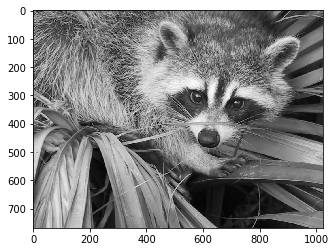

In [11]:
plt.imshow(face, cmap=plt.cm.gray)

Now, apply the function `np.sin(x/25)` to the face matrix and then plot it again. This doesn't do anything very deep, it just messes with the shades of gray in a nonlinear way.

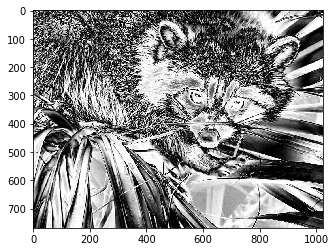

In [12]:
plt.imshow(np.sin(face/25), cmap=plt.cm.gray)

Imagine a circle with a center at the matrix indices (300, 620) and a radius of 250. In the x-y plane, this would be 620, 300. Write a snippet of code that, for each pixel, calculates the distance of that pixel from the center of this circle. If the distance is greater than the radius of the circle, set the value of the pixel (the element of the matrix) equal to zero. Plot the result, again using `plt.ishow` with a gray colormap.

Be sure to create a new copy of the `face` matrix, `face2`. Create a proper copy using the `copy` method of the `np.array` class.

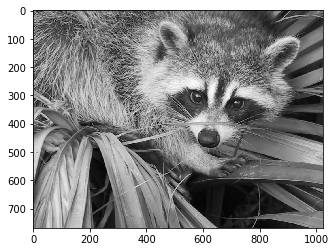

In [13]:
face2 = face.copy()
cx, cy = 620, 300
radius = 250
for i in range(face.shape[0]):
    for j in range(face.shape[1]):        
        # Your code here
        pass
        
plt.imshow(face2, cmap=plt.cm.gray)

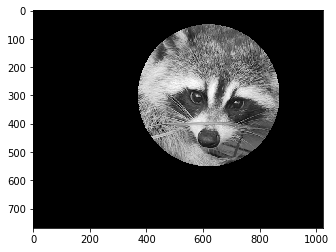

In [14]:
face2 = face.copy()
cx, cy = 620, 300
radius = 250
for i in range(face.shape[0]):
    for j in range(face.shape[1]):
        distance_from_center = np.sqrt((cx - j)**2 + (cy - i)**2)
        if distance_from_center > radius:
            face2[i,j] = 0

plt.imshow(face2, cmap=plt.cm.gray)

## 2.2 Compressing an Image with Linear Algebra (2 points for each part)

Here we'll play with the Singular Value Decomposition (SVD) function in Numpy's `linalg` submodule. You can think of the SVD as a generalization of the eigenvalue decomposition for non-square matrices.

Here we will be using the same `face` matrix as above.

 - (1) To begin, calculate the SVD using the code. (For this part, you can just copy and paste this code.)
 
     `u, s, v = np.linalg.svd(face, full_matrices=False)`

In [15]:
u, s, v = np.linalg.svd(face, full_matrices=False)

 - (2) Calculate the shape of `u`, `s`, and `v`.

In [16]:
u.shape

(768, 768)

In [17]:
s.shape

(768,)

In [18]:
v.shape

(768, 1024)

 - (3) Construct a matrix by matrix multiplying `u`, `s`, and `v`. Note that `s` doesn't conform as it stands. Mathematically, we want to compute 
$$
U \cdot \text{diag}(S) \cdot V.
$$
Thus, we need $\text{diag}(S)$ to be a 768 x 768 matrix with the values of `s` on the diagonal. These are the singular values---analogous to the eigenvalues---of the `face` matrix. Use `np.diag` to do this. Use `@` to perform the matrix multplication. Call this new matrix `faceUSV`.

In [19]:
faceUSV = u @ np.diag(s) @ v

 - (4) Use the function `np.allclose` to test if all of the elements of the matrices `faceUSV` and `face` are numerically close. Does this verify that our reconstruction was successful? Why are we using `np.allclose` instead of, say, `faceUSV == face` to test if the matrices are the same?

In [20]:
np.allclose(faceUSV, face)

True

In [21]:
# There are two reasons. Using `faceUSV == face` compares the individual elements and returns an array.
# If we wanted to return a single truth value, we would use `np.array.all`. 
# The second reason is that `==` is too harsh, in a sense. Due to numerical error, these
# arrays may be slightly different. `np.allclose` tests if the are close within some small margin of error.
# Below is an example of what we would not want to do.
(faceUSV == face).all()

False

 - (5) Now, construct a function called `compress` that takes in a number `n` and returns a matrix constructed as follows:
 
$$
U_n \cdot \text{diag}(S_n) \cdot V_n
$$
where $U_n$ is only the first `n` columns of the matrix `u`, $\text{diag}(S_n)$ is the first `n` singular values put on the diagonals of a matrix of zeros (hint: `np.diag(s[0:n])`), and $V_n$ is the first `n` rows of the matrix `v`.

In [22]:
def compress(n):
    face_compressed = u[:,0:n] @ np.diag(s[0:n]) @ v[0:n,:]
    return face_compressed

 - (6) Use your newly created `compress` function to create the a matrix called `face_compressed` for various values of `n`. Plot the matrix using `plt.imshow(face_compressed, cmap=plt.cm.gray)`. Do this for `n in [500, 300, 100, 50, 10]`. What do you see happening?

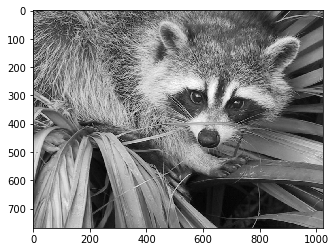

In [23]:
face_reduced = compress(500)
plt.imshow(face_reduced, cmap=plt.cm.gray)

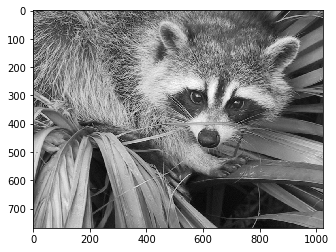

In [24]:
face_reduced = compress(300)
plt.imshow(face_reduced, cmap=plt.cm.gray)

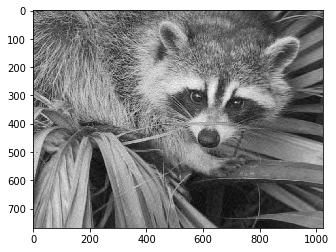

In [25]:
face_reduced = compress(100)
plt.imshow(face_reduced, cmap=plt.cm.gray)

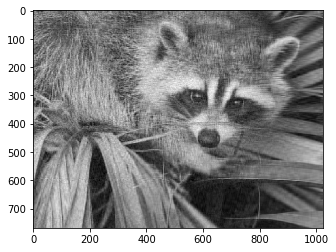

In [26]:
face_reduced = compress(50)
plt.imshow(face_reduced, cmap=plt.cm.gray)

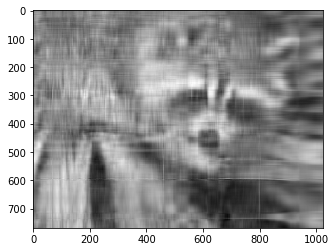

In [27]:
face_reduced = compress(10)
plt.imshow(face_reduced, cmap=plt.cm.gray)

 - (7). Again use the `size` method to calculate the number of "pixels" (elements in the array) that are in the original `face` matrix. Now, suppose we use the SVD to store this image. Write a function called `storage_size` that computes that number of elements in $U_r$, the number of elements in $V_r$, adds them together, and then adds $n$ for the number of singular values of the $S_r$ vector used. That is
 
 $$
 storageSize = numberOfElements(U_n) + numberOfElements(V_n) + numberOfElements(S_n)
 $$

In [28]:
def storage_size(n):
    s = u[:,0:n].size + n + v[0:n,:].size
    # Alternatively, u[:,0:n].size + s[0:n].size + v[0:n,:].size
    return s

 - (8) Compute the storage size for each of the values of `n` that we tested above. Compared to the original size, `face.size`,
 how much space are we saving (in percentages) when we use `n=100` (which looks almost lossless)?

In [29]:
face.size

786432

In [30]:
n_array = [500, 300, 100, 50, 10]
for n in n_array:
    print("n: ", n) 
    print("size", storage_size(n))

n:  500
size 896500
n:  300
size 537900
n:  100
size 179300
n:  50
size 89650
n:  10
size 17930


In [31]:
# We are saving approx. 77 percent!
storage_size(100)/face.size

0.22799173990885416

**NOTE:** Essentially, we are reconstructing the matrix (and image) using the first `n` singular values. Equivalently, we could say that we are using Principal Component Analysis and reconstructing the image using the first `n` principal components. If this were a square matrix, we could say that we are using the first `n` eigenvalues and eigenvectors.

We will later see that this same technique can be used to analyze complex data. Imagine, for example, applying this procedure to a matrix of data or to the variance-covariance matrix of a set of variables. We will later see that, in the same way that we are compressing and summarizing a complex image, we can summarize the joint distribution of a set of variables.

## 2.3 Fitting a Curve to Data

In this exercise, you will fit a nonlinear curve to data by minimizing the sum of squares. Below, I have given data and a function to plot the data and a curve over the data. The curve is the following function:
$$
y(t) = x_0 \exp(-x_2 t) + x_1 \exp(-x_3 t).
$$

In [32]:
from scipy.optimize import minimize
data = np.array(
  [[0.0000, 5.8955], 
   [0.1000, 3.5639],
   [0.2000, 2.5173],
   [0.3000, 1.9790],
   [0.4000, 1.8990],
   [0.5000, 1.3938],
   [0.6000, 1.1359],
   [0.7000, 1.0096],
   [0.8000, 1.0343],
   [0.9000, 0.8435],
   [1.0000, 0.6856],
   [1.1000, 0.6100],
   [1.2000, 0.5392],
   [1.3000, 0.3946],
   [1.4000, 0.3903],
   [1.5000, 0.5474],
   [1.6000, 0.3459],
   [1.7000, 0.1370],
   [1.8000, 0.2211],
   [1.9000, 0.1704],
   [2.0000, 0.2636]])

def plot_against_data(x):
    tgrid = data[:,0]
    ydata = data[:,1]
    yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
    y = yfunc(tgrid)
    plt.plot(tgrid, ydata, '.')
    plt.plot(tgrid, y)
    
x_initial = np.array([1, 1, 1, 0])

 - (1): Use the given plotting function to plot the data and the curve for the given initial guess of the parameters, `x_initial`.

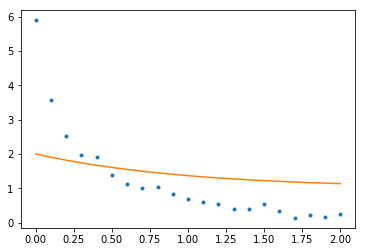

In [33]:
plot_against_data(x_initial)

 - (2) Write a function called `sum_squares` that takes in a vector of model paraters (e.g., `x_initial`) and returns the sum of squares that results from the difference of the data and the curve defined by `x_initial`. What is the sum of squares that results from the given `x_initial`?

In [34]:
def sum_squares(x):
    tgrid = data[:,0]
    ydata = data[:,1]
    yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
    y = yfunc(tgrid)
    s = np.sum((y - ydata)**2)
    return s

In [35]:
sum_squares(x_initial)

27.432326688864467

 - (3) Use `scipy.optimize.minimize` to minimize the sum of squares, using the function that you wrote previously. Save the optimal parameters to the variable `xstar`.

In [36]:
opt = minimize(sum_squares, x_initial)
xstar = opt.x
xstar

array([ 3.00689948,  2.88903261, 10.58641776,  1.4003174 ])

 - (4) Use the `plot_against_data` function that was given to plot the optimal curve, defined by `xstar`, against the data.

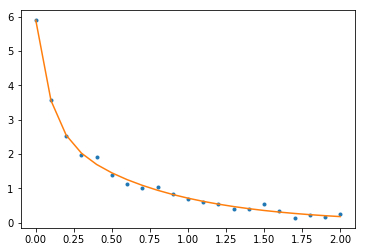

In [37]:
plot_against_data(xstar)

# 3. Maximum Likelihood with a biased coin

Suppose that you flip an unfair (biased) coin. Each time you get "heads", you record a 1. A "tails" is a zero. Suppose that the probability `p` of a heads is fixed, but unknown. You record the following data and save it in a pandas DataFrame:

```python
df = pd.DataFrame([0,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1], columns=['heads'])
```
Use maximum likelihood to estimate the value of `p`. The log-likelihood function is given by
$$
\ell = k \log(p) + (n-k) \log(1-p),
$$
where $k$ is the number of heads flipped and $n$ is the total number of coin flips.

Hint: Use `scipy.optimize.minimize_scalar` and make sure to include the keyword argument `method='bounded'` with the appropriate bounds. Assume that $0 < p < 1$.

In [38]:
# Solution

import pandas as pd
import numpy as np
import scipy.optimize
import scipy.stats

from matplotlib import pyplot as plt

df = pd.DataFrame([0,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1], columns=['heads'])

def neg_log_lik(p):
#     p = theta[0]
    k = df.heads.sum()
    n = df.shape[0]
    log_lik = k * np.log(p) + (n-k) * np.log(1-p)
    return - log_lik

out = scipy.optimize.minimize_scalar(neg_log_lik, bounds=[0,1], method='bounded')
out

     fun: 11.24670289237658
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 0.7499999119032107

#### Plot the log-likelihood function

Plot the log-likelihood function over the values of 0.01 to .99. Make the plot fine enough so that you can see what's going on. (That is, if you use `linspace`, the number of points on the grid is up to you.)

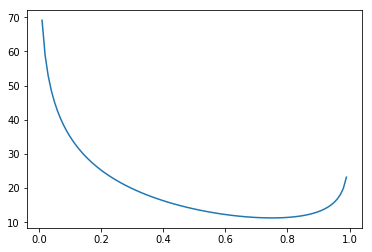

In [39]:
# solution
x = np.linspace(0.01,.99,100)
y = neg_log_lik(x)
plt.plot(x,y)

# 4. Application: Mean-Variance Efficient Portfolios


In this application, we replicate the Markowitz model of portfolio optimization. This model is a model of investor behavior. It models an investor you prefers a portfolio that has higher expected returns and lower variance, *ceteris paribus*. The result of this assumption is that investors (1) choose diversified portfolios and (2) that there exist on a "mean-variance efficient frontier" along which investors choose their portfolios. That is, there are some portfolios that consist of some combinations of assets that are strictly dominated by other combinations of assets. This model  formalizes the notion that an investor should not "put all of his/her eggs in one basket" as well as  the tradeoff between risk and return.

(Note: There are other important lessons that we can learn from this model, but they are beyond the scope of this class. For one, you may search Google for the concept of the "two-portfolio separation theorem." Also note that we are excluding any "risk-free" short-term assets from our analysis here. Also note that Markowitz won the Nobel prize in economics in 1990 for this analysis.)


# 4.1 Unconstrained Portfolio Optimization

Suppose that $\mu$ is a column vector of the means of each asset and suppose that $\Sigma$ is the associated variance-covariance matrix. Now, suppose that we create a column vector of weights $w$ that tells us the fraction of our wealth that we invest in each asset. Then, the formulas in matrix notation for the mean and variance of the resulting portfolio are
$$
\mu_p = \mu' w
$$
and
$$
\sigma_p^2 = w' \Sigma w
$$
respectively.

In this folder, there should be a file called `dataAssets.csv`. Make sure that you have this file. Run the code below to load the data into numpy arrays.

In the matrix of prices, each row corresponds to a day. The columns correspond, (in order,) to the S&P 500 index, USD index, crude oil index, HYG index, and U.S. 10-yr Treasury index. Here I have converted prices to returns for you.

In [40]:
url = r'https://raw.githubusercontent.com/jmbejara/comp-econ-sp18/master/HW/hw-01/dataAssets.csv'
data_assets = pd.read_csv(url, parse_dates=['date'])
prices = data_assets.iloc[:,1:].values
dates = data_assets.iloc[:,0].values
rets = (prices[1:,:]/prices[:-1,:] - 1) * 100

In [41]:
np.set_printoptions(precision=3, suppress=True)
data_assets.head()

,date,sp500,USD_index,crude_oil,HYG,treasury_10yr
0,2013-08-07,1690.91,81.287,87.83,91.36,2.5986
1,2013-08-08,1697.48,80.977,87.50,91.56,2.5892
2,2013-08-09,1691.42,81.126,87.95,91.57,2.5784
3,2013-08-12,1689.47,81.333,88.19,91.49,2.6206
4,2013-08-14,1685.39,81.711,88.47,91.31,2.7136


 - (1) Compute the means of the assets and the variance-covariance matrix. Save the means as the numpy array `mu`. Save the variance-covariance matrix as the numpy array `Sigma`.
 

In [42]:
mu = np.mean(rets, axis=0)
mu

array([ 0.032,  0.033, -0.114, -0.01 , -0.009])

In [43]:
Sigma = np.cov(rets, rowvar=False)
Sigma

array([[ 0.664,  0.042,  0.347,  0.189,  0.58 ],
       [ 0.042,  0.204, -0.114,  0.003,  0.221],
       [ 0.347, -0.114,  3.174,  0.199,  0.78 ],
       [ 0.189,  0.003,  0.199,  0.127,  0.06 ],
       [ 0.58 ,  0.221,  0.78 ,  0.06 ,  4.478]])

 - (2) For practice, create a vector of portfolio weights that puts equal weight on each of the ten assets. Compute the mean and the variance of this portfolio.

In [44]:
w = np.array([.2, .2, .2, .2, .2])

In [45]:
mean = w @ mu
mean

-0.013604313563988009

In [46]:
var = w.transpose() @ Sigma @ w
var

0.530379191322454

 - (2) Solve for the optimal portfolio that solves the following contrained minimization problem given a target expected portfolio return of $\mu_p = 0.01$.
 
\begin{align*}
\min_{w} \quad & w' \Sigma w \\
\text{s.t.} \quad & w' \mu = \mu_p \\
& w' \mathbb 1 = 1 
\end{align*}
where $\mathbb 1$ is a conforming vector of ones. For an initial guess for the optimizer, choose a portfolio of equal weights to each asset (a $5 \times 1$ vector of the value $0.2$).

Use `scipy.optimize.fmin_slsqp`. In order to incorporate two constraints, carefully read the documentation regarding the keyword argument `eqcons`.

Save the optimal set of portfolio weights as `wstar`. Calculate the variance of this optimal portfolio. Verify that the sum of the weights is numerically close to 1.

In [47]:
var_func = lambda w: w.transpose() @ Sigma @ w
mu_target = 0.01
con_mean = lambda w: w @ mu - mu_target
con_port = lambda w: w @ np.ones((5,1)) - 1
eqcons = [con_mean, con_port]

w0 = np.array([.2, .2, .2, .2, .2])
wstar = scipy.optimize.fmin_slsqp(var_func, w0, eqcons=eqcons, iprint=2)
wstar

  NIT    FC           OBJFUN            GNORM
    1     7     5.303792E-01     3.110235E+00
    2    15     2.386745E-01     1.479309E+00
    3    22     8.379287E-02     4.043990E-01
    4    29     7.979823E-02     3.289420E-01
    5    36     7.969781E-02     3.276882E-01
    6    43     7.967125E-02     3.277134E-01
    7    50     7.966870E-02     3.280106E-01
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.07966870434881292
            Iterations: 7
            Function evaluations: 50
            Gradient evaluations: 7


array([-0.041,  0.468, -0.016,  0.597, -0.008])

In [48]:
sum(wstar)

0.9999999999999999

In [49]:
var_func(wstar)

0.07966870434881292

 - (3) Use `numpy.linspace` to create a vector of `N` values equally spaced from -0.01 to 2. Call this vector `mean_grid`. For each value in this mean grid with `N=100`, solve the above maximization problem with the value of the mean grid as the target expected portfolio return $\mu_p$. For each solution, record the value of the objective. That is, record the minimal portfolio return variance needed to acheive the desired expected portfolio return. Plot the two vectors that result on a plot with the x-axis labelled 'Portfolio Return Variance', the y-axis labelled 'Mean Portfolio Return', and the title of plot as 'Mean-Variance Efficient Frontier'.

In [50]:
N = 100
mean_grid = np.linspace(-0.01, 2, N)
var_grid = np.zeros(N)

In [51]:
for i in range(N):
    mu_target = mean_grid[i]
    var_func = lambda w: w.transpose() @ Sigma @ w
    con_mean = lambda w: w @ mu - mu_target
    con_port = lambda w: w @ np.ones((5,1)) - 1
    eqcons = [con_mean, con_port]
    w0 = np.array([.2, .2, .2, .2, .2])
    wstar = scipy.optimize.fmin_slsqp(var_func, w0, eqcons=eqcons, acc=1e-09, 
                                      iprint=0)
    var_grid[i] = var_func(wstar)

Text(0.5,1,'Mean-Variance Efficient Frontier')

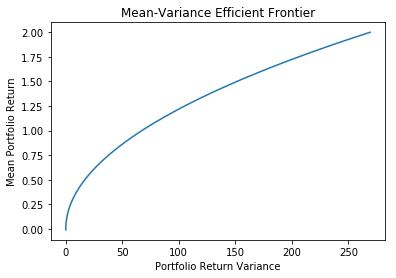

In [52]:
plt.plot(var_grid, mean_grid)
plt.xlabel('Portfolio Return Variance')
plt.ylabel('Mean Portfolio Return')
plt.title('Mean-Variance Efficient Frontier')

## 4.2 Short-selling constraint

Suppose we take the problem from before and add a new set of constraints. Let's add bounds on the portfolio weights such that no weight may be less than zero. We can interpret this as a constraint that disallows "short-selling." In particular, solve the problem

\begin{align*}
\min_{w} \quad & w' \Sigma w \\
\text{s.t.} \quad & w' \mu = \mu_p \\
& w' \mathbb 1 = 1 \\
& w_i \geq 0 \quad \text{ for all } i=1,..,k.
\end{align*}

Use `scipy.optimize.fmin_slsqp` again. Check the documentation for information on how to include "bound constraints." https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_slsqp.html


**Hint**: Edit the code below to incorporate the constraints:

```python
mu = np.mean(rets, axis=0)
Sigma = np.cov(rets, rowvar=False)

N = 100
mean_grid = np.linspace(0.0, .02, N)
var_grid = np.zeros(N)
var_grid_no_short = np.zeros(N)

for i in range(N):
    mu_target = mean_grid[i]
    var_func = lambda w: w.transpose() @ Sigma @ w
    con_mean = lambda w: w @ mu - mu_target
    con_port = lambda w: w @ np.ones((5,1)) - 1
    eqcons = [con_mean, con_port]
    w0 = np.array([.2, .2, .2, .2, .2])
    wstar = scipy.optimize.fmin_slsqp(var_func, w0, eqcons=eqcons, acc=1e-09, 
                                      iprint=0)
    var_grid[i] = var_func(wstar)
    wstar = scipy.optimize.fmin_slsqp(var_func, w0, 
                                      eqcons=eqcons,
                                      bounds=YOUR_CODE_HERE,
                                      acc=1e-09, 
                                      iprint=0)
    var_grid_no_short[i] = var_func(wstar)

plt.plot(var_grid, mean_grid, label='Unconstrained')
plt.plot(var_grid_no_short, mean_grid, label='No-Short Selling')
plt.xlabel('Portfolio Return Variance')
plt.ylabel('Mean Portfolio Return')
plt.title('Mean-Variance Efficient Frontier')
plt.legend()

```

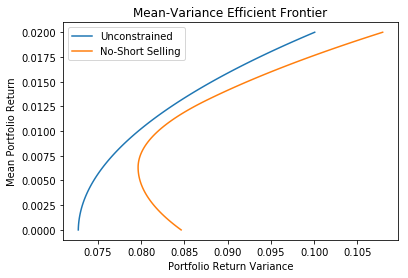

In [53]:
# SOLUTION
mu = np.mean(rets, axis=0)
Sigma = np.cov(rets, rowvar=False)

N = 100
mean_grid = np.linspace(0.0, .02, N)
var_grid = np.zeros(N)
var_grid_no_short = np.zeros(N)

no_short_bounds = [(0,np.inf), (0,np.inf), (0,np.inf), (0,np.inf), (0,np.inf)]

for i in range(N):
    mu_target = mean_grid[i]
    var_func = lambda w: w.transpose() @ Sigma @ w
    con_mean = lambda w: w @ mu - mu_target
    con_port = lambda w: w @ np.ones((5,1)) - 1
    eqcons = [con_mean, con_port]
    w0 = np.array([.2, .2, .2, .2, .2])
    wstar = scipy.optimize.fmin_slsqp(var_func, w0, eqcons=eqcons, acc=1e-09, 
                                      iprint=0)
    var_grid[i] = var_func(wstar)
    wstar = scipy.optimize.fmin_slsqp(var_func, w0, 
                                      eqcons=eqcons,
                                      bounds=no_short_bounds,
                                      acc=1e-09, 
                                      iprint=0)
    var_grid_no_short[i] = var_func(wstar)

plt.plot(var_grid, mean_grid, label='Unconstrained')
plt.plot(var_grid_no_short, mean_grid, label='No-Short Selling')
plt.xlabel('Portfolio Return Variance')
plt.ylabel('Mean Portfolio Return')
plt.title('Mean-Variance Efficient Frontier')
plt.legend();